# Basic Model with Data Augmentation

### Dataset:[Br35H]( https://www.kaggle.com/ahmedhamada0/brain-tumor-detection)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports

In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize

from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras

# DataLoader 

In [ ]:
datadir = '/content/gdrive/MyDrive/Tumor'
categories = ['no', 'yes']
x = []
y = []

for category in categories:
    path = os.path.join(datadir, category)
    for image in os.listdir(path):
        images = cv2.imread(os.path.join(path, image))
        color = cv2.imread(path, cv2.COLOR_BGR2RGB)
        images = resize(images, (224, 224, 3), mode = 'constant', preserve_range = True)
        x.append(images)
        y.append(categories.index(category))

In [ ]:
no = 0
yes = 0

for i in range(len(x)):
    if y[i] == 0:
        no= no + 1
    elif y[i] == 1:
        yes = yes + 1
        
print("Total Images: ", len(x))
print("Total Images No Tumor: ", no)
print("Total Images Tumor: ", yes)

Total Images:  3000
Total Images No Tumor:  1500
Total Images Tumor:  1500


# Class Binarization

>0 = No tumor
>1 =Tumor



In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(y))} 
target_val=  [target_dict[y[i]] 
              for i in range(len(y))]

## Split (Train, Test, Validation)


In [ ]:
X2, X_test, y2, y_test = train_test_split(x, y, test_size=0.1,random_state=42,shuffle=True,stratify=y) # Test
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.2,random_state=42,shuffle=True,stratify=y2) #Training(80%) and Validation(20%)

print('Train size:', len(X_train))
print('Validation size:', len(X_val))
print('Test size:', len(X_test))

Train size: 2160
Validation size: 540
Test size: 300


In [ ]:
classes = np.unique (y_train)
classes_num = len(classes)

print ('Outputs: ', classes_num)
print ('Classes: ', classes)

Outputs:  2
Classes:  [0 1]


### Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

## CNN Architecture


In [ ]:
model = keras.models.Sequential(
        [
          
            keras.layers.InputLayer(input_shape=(224,224, 3)),
            keras.layers.Conv2D(32, kernel_size =(5,5), strides = (2,2),padding = 'same', activation= 'relu'),
            keras.layers.MaxPooling2D(pool_size =(2,2)),
                    
       
            keras.layers.Conv2D(64, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu'),
            keras.layers.MaxPooling2D(pool_size =(2,2)),
            
         
            keras.layers.Conv2D(128, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu'),
            keras.layers.MaxPooling2D(pool_size =(2,2)),
  
            keras.layers.Flatten(),
            keras.layers.Dropout(0.4),
            
         
            keras.layers.Dense(128, activation = 'relu'),   
            keras.layers.Dropout(0.4), 
           
            keras.layers.Dense(1, activation = 'sigmoid'),
               
        ])   

#Adam Compiler/ Compilador Adam - learning_rate= 0.001
model.compile(optimizer = 'adam' , loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()
                

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)       

## Training

In [ ]:
x_test = np.array(X_test) 
x_train = np.array(X_train)
y_test = np.array(y_test)
y_train = np.array(y_train)
x_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
print (x_val.shape, y_val.shape)

(2160, 224, 224, 3) (2160,)
(300, 224, 224, 3) (300,)
(540, 224, 224, 3) (540,)


# Model Fit

In [ ]:
history = model.fit(x_train, y_train, epochs=60, batch_size = 32, validation_data=(x_val, y_val)) 

Epoch 1/60
68/68 [==============================] - 14s 37ms/step - loss: 2.6255 - accuracy: 0.6551 - val_loss: 0.4769 - val_accuracy: 0.8000
Epoch 2/60
68/68 [==============================] - 1s 20ms/step - loss: 0.4935 - accuracy: 0.7560 - val_loss: 0.4145 - val_accuracy: 0.8148
Epoch 3/60
68/68 [==============================] - 1s 20ms/step - loss: 0.4460 - accuracy: 0.7806 - val_loss: 0.3536 - val_accuracy: 0.8333
Epoch 4/60
68/68 [==============================] - 1s 20ms/step - loss: 0.3607 - accuracy: 0.8444 - val_loss: 0.2967 - val_accuracy: 0.8741
Epoch 5/60
68/68 [==============================] - 1s 20ms/step - loss: 0.3311 - accuracy: 0.8523 - val_loss: 0.2534 - val_accuracy: 0.8981
Epoch 6/60
68/68 [==============================] - 1s 21ms/step - loss: 0.2648 - accuracy: 0.8861 - val_loss: 0.2151 - val_accuracy: 0.9278
Epoch 7/60
68/68 [==============================] - 1s 21ms/step - loss: 0.2374 - accuracy: 0.9088 - val_loss: 0.2191 - val_accuracy: 0.9185
Epoch 8/60
6

In [ ]:
model.save('/content/gdrive/MyDrive/Bracis/BD/modelBr35HDataAug.h5')

## Model Evaluate

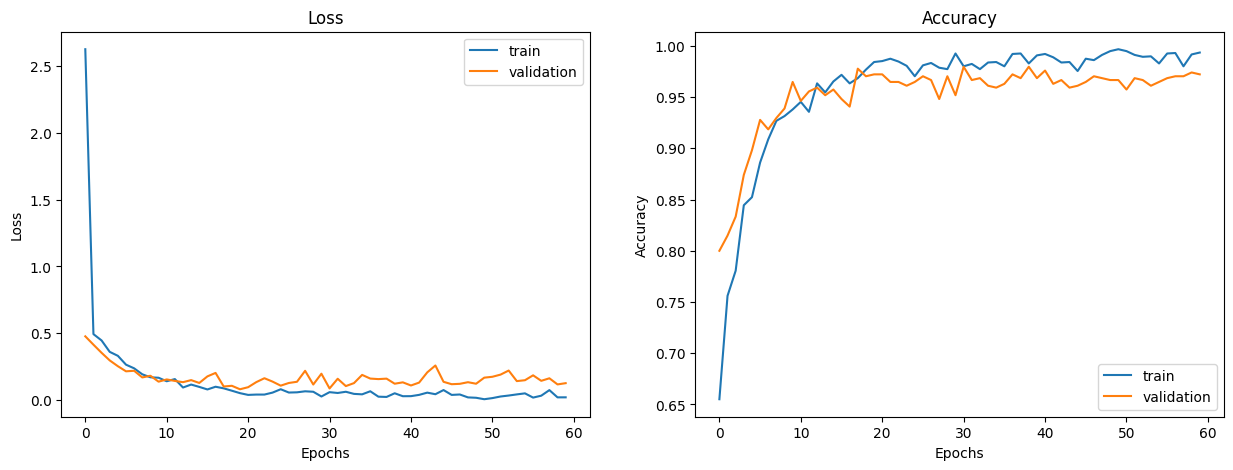

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend();
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend();

In [ ]:
print ('Loss and Accuracy:')
model.evaluate(x_test, y_test)

Loss and Accuracy:
10/10 [==============================] - 0s 24ms/step - loss: 0.1802 - accuracy: 0.9633


[0.18019074201583862, 0.9633333086967468]

10/10 [==============================] - 0s 10ms/step


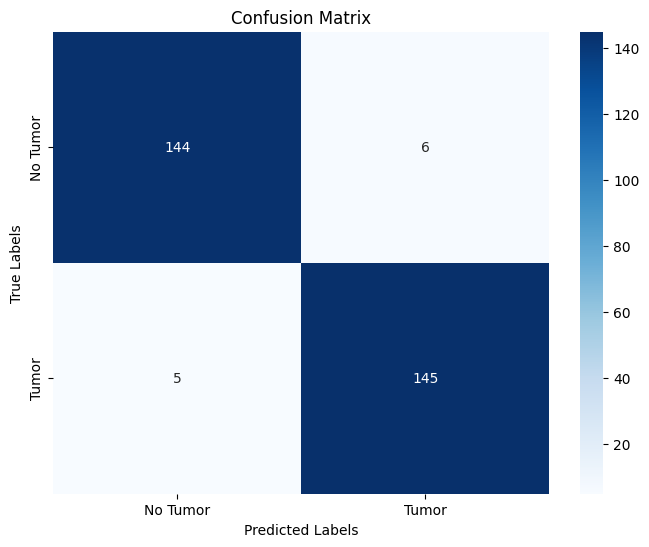

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

cmat=confusion_matrix(y_test,y_pred,labels=[0,1])
cm_df = pd.DataFrame(cmat)

cmat_df = pd.DataFrame(cmat,
                     index = ['No Tumor','Tumor' ], 
                     columns = ['No Tumor','Tumor' ])

plt.figure(figsize=(8,6))
sns.heatmap(cmat_df, annot=True,fmt="d",cmap=plt.cm.Blues )
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
tp = cmat[1][1] # True positive
fp = cmat[0][1] # False positive
tn = cmat[0][0] # True negative
fn = cmat[1][0] # False negative

accuracy = ((tp+tn)*100)/np.sum(cmat)
precision = (tp*100)/(tp+fp)
sensibility = (tp*100/(tp+fn))
specificity = (tn*100)/(fp+tn)

print('Metrics')
print('Accuracy:..........>',accuracy,"%")
print('Precision:..........>',precision,"%")
print('Recall:.....>',sensibility,"%")
print('Specificity:....>',specificity,"%")

plt.show()

Metrics
Accuracy:..........> 96.33333333333333 %
Precision:..........> 96.02649006622516 %
Recall:.....> 96.66666666666667 %
Specificity:....> 96.0 %


## ROC Curve

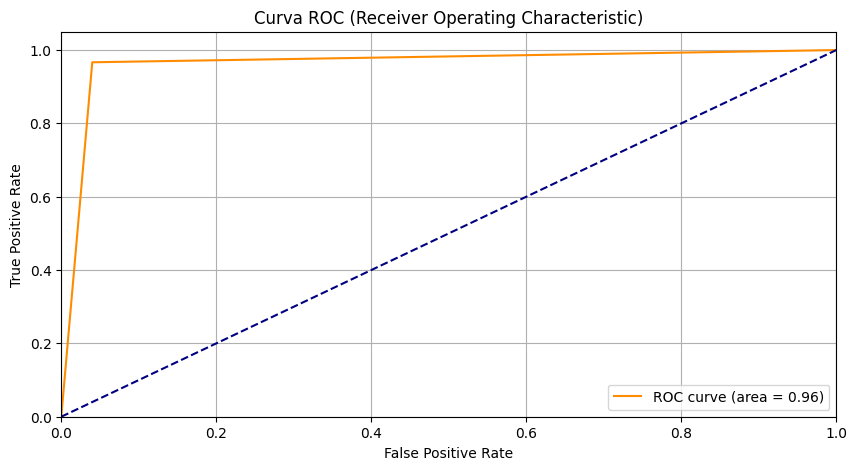

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Predictions

1/1 [==============================] - 0s 22ms/step


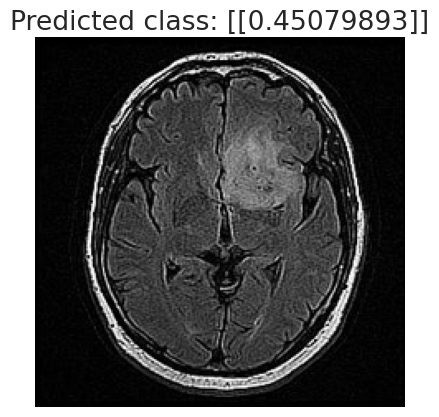

In [ ]:
import numpy as np
from PIL import Image


# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Tumor/yes/y1200.jpg")
img = img.resize((224, 224))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 23ms/step


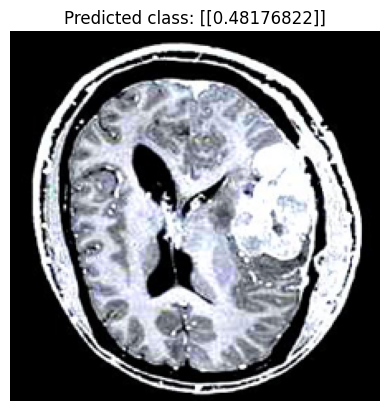

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from PIL import Image

# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Tumor/yes/y12.jpg")
img = img.resize((224, 224))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 22ms/step


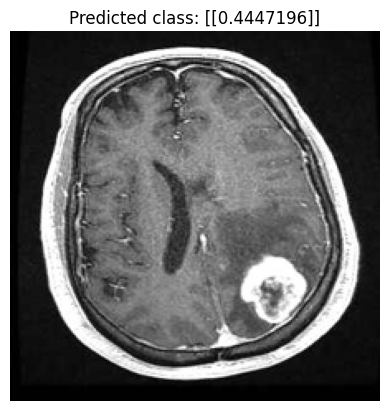

In [ ]:

# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Tumor/yes/y333.jpg")
img = img.resize((224, 224))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 23ms/step


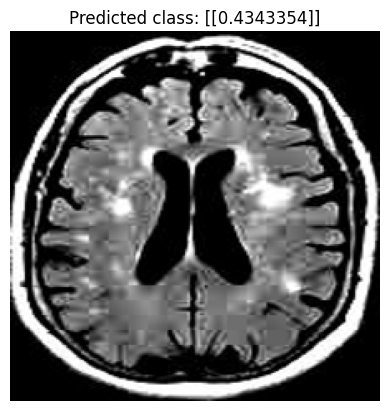

In [ ]:
import numpy as np
from PIL import Image

# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Tumor/no/no1.jpg")
img = img.resize((224, 224))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 21ms/step


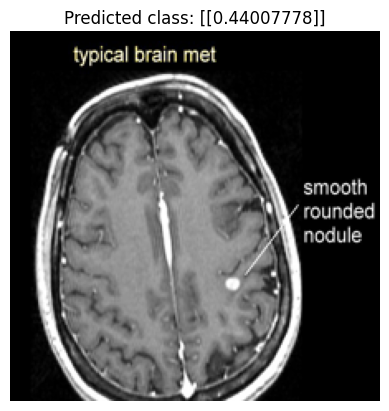

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/1207met.jpg")
img = img.resize((224, 224))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

### Layers Visualization

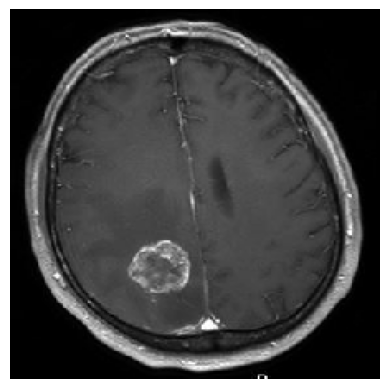

In [ ]:

img_path = ("/content/gdrive/MyDrive/Tumor/yes/y1494.jpg")

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(224, 224))

import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [ ]:

from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 102ms/step


(1, 112, 112, 32)


(-0.5, 111.5, 111.5, -0.5)

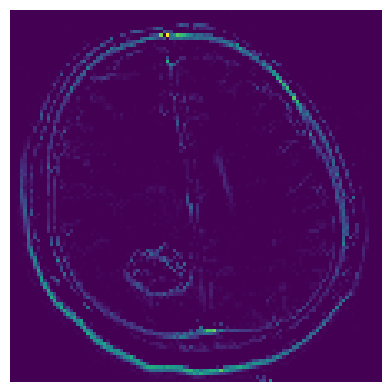

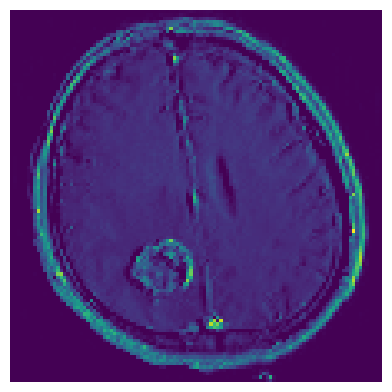

In [ ]:

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 2], cmap="viridis") #First layer, channel=3
plt.axis("off")

plt.matshow(first_layer_activation[0, :, :, 6], cmap="viridis") #First layer, channel=7
plt.axis("off")
     

(1, 56, 56, 32)


(-0.5, 55.5, 55.5, -0.5)

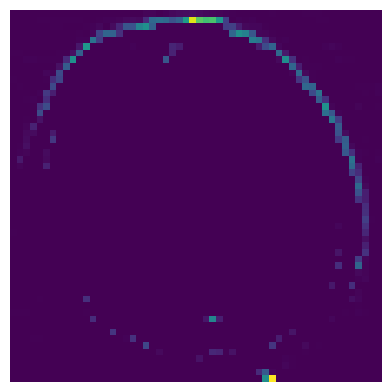

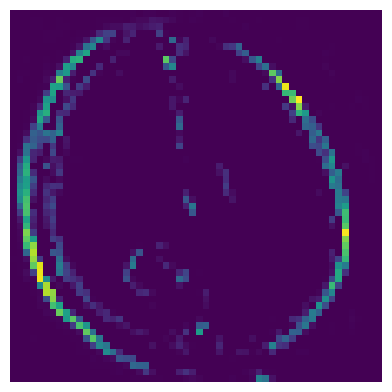

In [ ]:
second_layer_activation = activations[1] 
print(second_layer_activation.shape)

plt.matshow(second_layer_activation[0, :, :, 5], cmap="viridis") #Second layer, 4th channel
plt.axis("off")

plt.matshow(second_layer_activation[0, :, :, 28], cmap="viridis") #Second layer, 27th channel
plt.axis("off")
     

(1, 28, 28, 64)


(-0.5, 27.5, 27.5, -0.5)

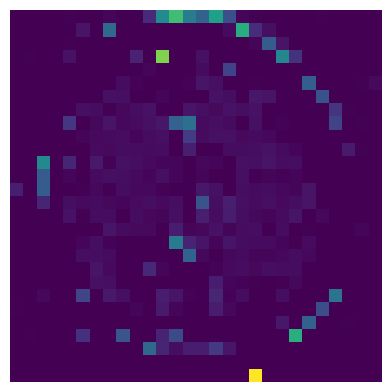

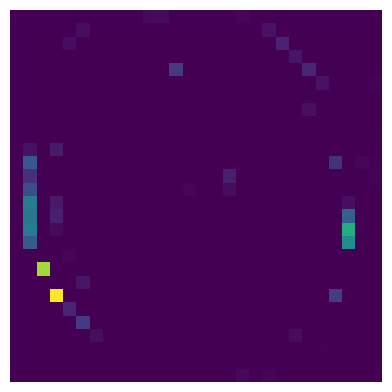

In [ ]:
third_layer_activation = activations[2]
print(third_layer_activation.shape)

plt.matshow(third_layer_activation[0, :, :, 12], cmap="viridis") #Third layer, 11th channel
plt.axis("off")

plt.matshow(third_layer_activation[0, :, :, 63], cmap="viridis") #Third layer, 62 channel
plt.axis("off")
     

(1, 14, 14, 64)


(-0.5, 13.5, 13.5, -0.5)

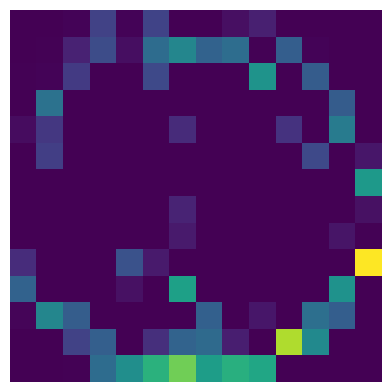

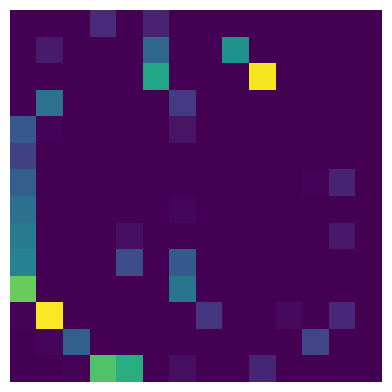

In [ ]:
fourth_layer_activation = activations[3]
print(fourth_layer_activation.shape)

plt.matshow(fourth_layer_activation[0, :, :, 2], cmap="viridis") #Third layer, 1th channel
plt.axis("off")

plt.matshow(fourth_layer_activation[0, :, :, 6], cmap="viridis") #Third layer, 5 channel
plt.axis("off")
     

(1, 7, 7, 128)


(-0.5, 6.5, 6.5, -0.5)

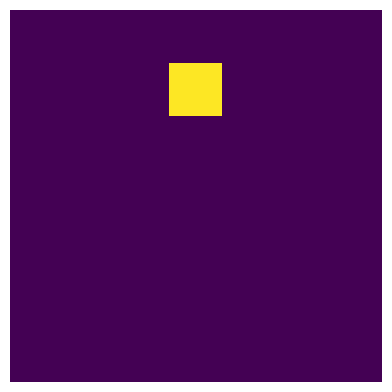

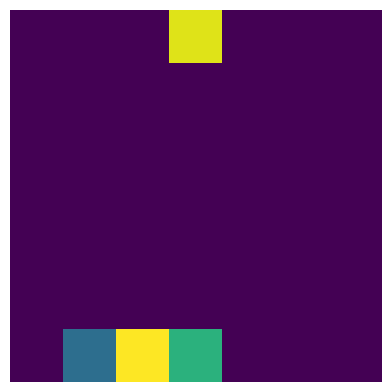

In [ ]:
fifth_layer_activation = activations[4]
print(fifth_layer_activation.shape)

plt.matshow(fifth_layer_activation[0, :, :, 4], cmap="viridis") #fifth layer, 3th channel
plt.axis("off")

plt.matshow(fifth_layer_activation[0, :, :, 51], cmap="viridis") #fifth layer, 50th channel
plt.axis("off")


(1, 3, 3, 128)


(-0.5, 2.5, 2.5, -0.5)

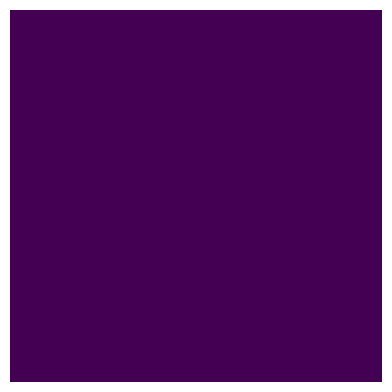

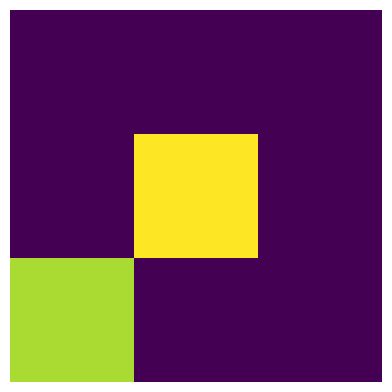

In [ ]:

sixth_layer_activation = activations[5]
print(sixth_layer_activation.shape)

plt.matshow(sixth_layer_activation[0, :, :, 5], cmap="viridis") #sixth layer, 4th channel
plt.axis("off")

plt.matshow(sixth_layer_activation[0, :, :, 45], cmap="viridis") #sixth layer, 44th channel
plt.axis("off")

(1, 3, 3, 128)


(-0.5, 2.5, 2.5, -0.5)

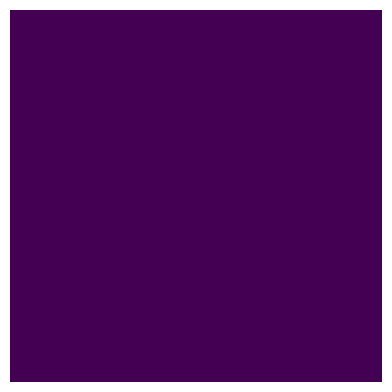

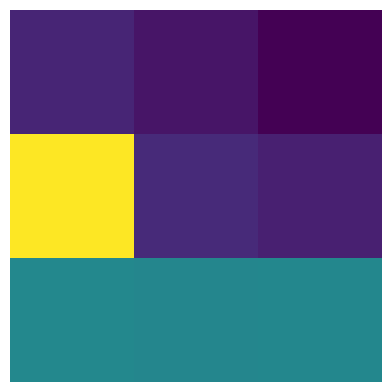

In [ ]:
seventh_layer_activation = activations[5]
print(seventh_layer_activation.shape)

plt.matshow(seventh_layer_activation[0, :, :, 2], cmap="viridis") #seventh layer,  channel=1
plt.axis("off")

plt.matshow(seventh_layer_activation[0, :, :, 15], cmap="viridis") #seventh layer, channel=14
plt.axis("off")
     

(1, 3, 3, 128)


(-0.5, 2.5, 2.5, -0.5)

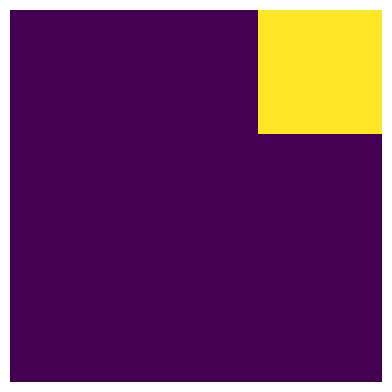

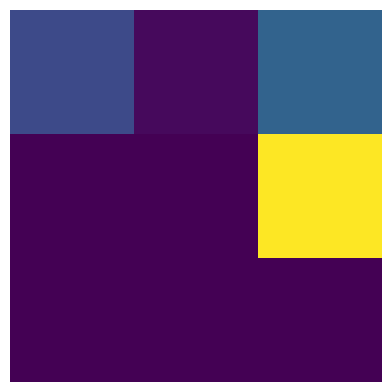

In [ ]:
eighth_layer_activation = activations[5]
print(eighth_layer_activation.shape)

plt.matshow(eighth_layer_activation[0, :, :, 1], cmap="viridis") #sixth layer,  channel=2
plt.axis("off")

plt.matshow(eighth_layer_activation[0, :, :, 115], cmap="viridis") #sixth layer, channel=114
plt.axis("off")

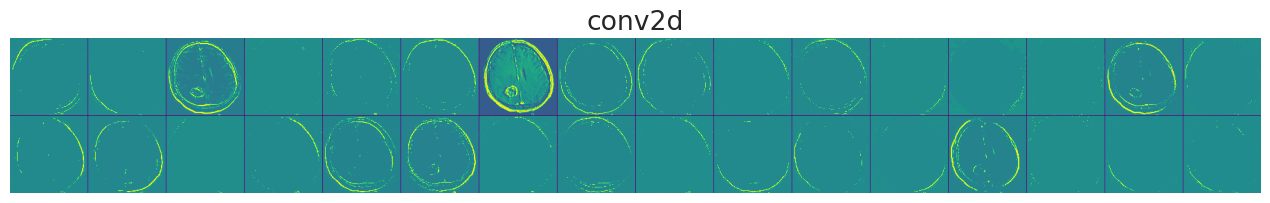

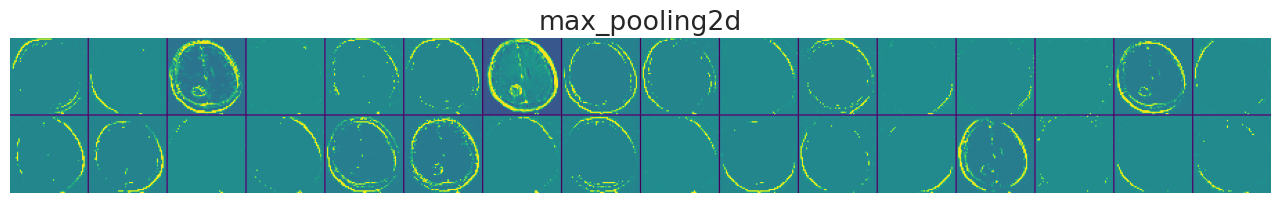

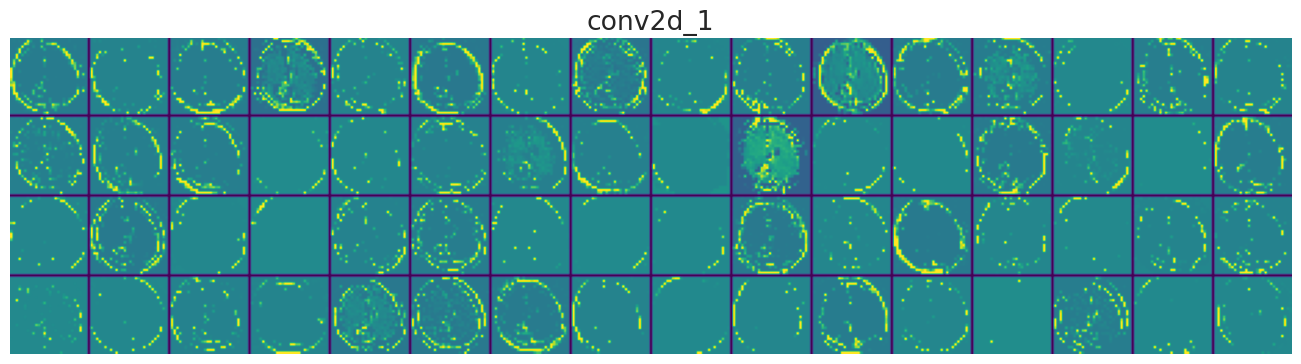

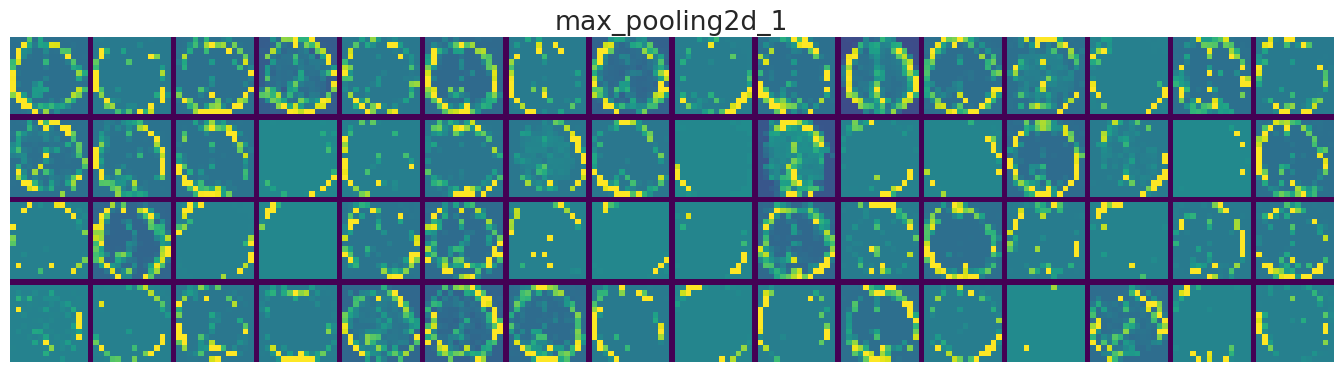

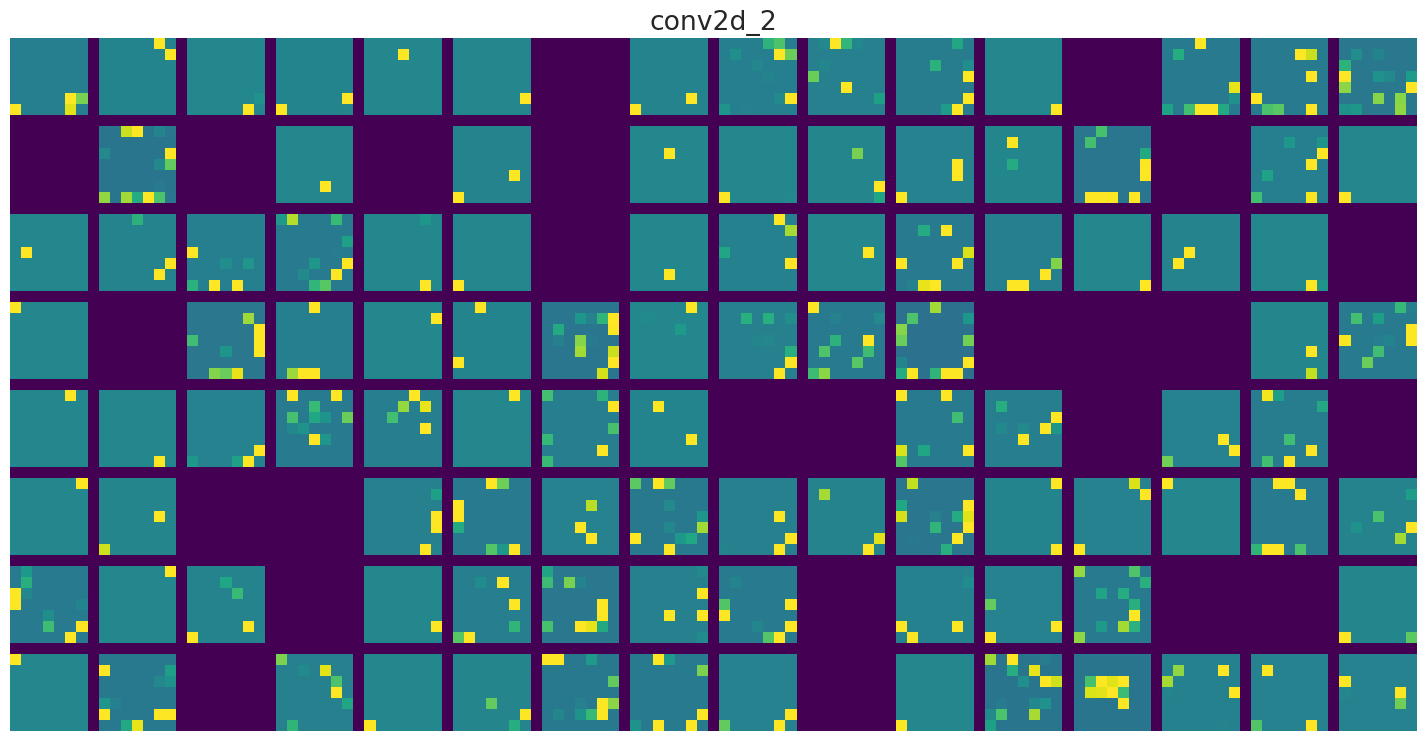

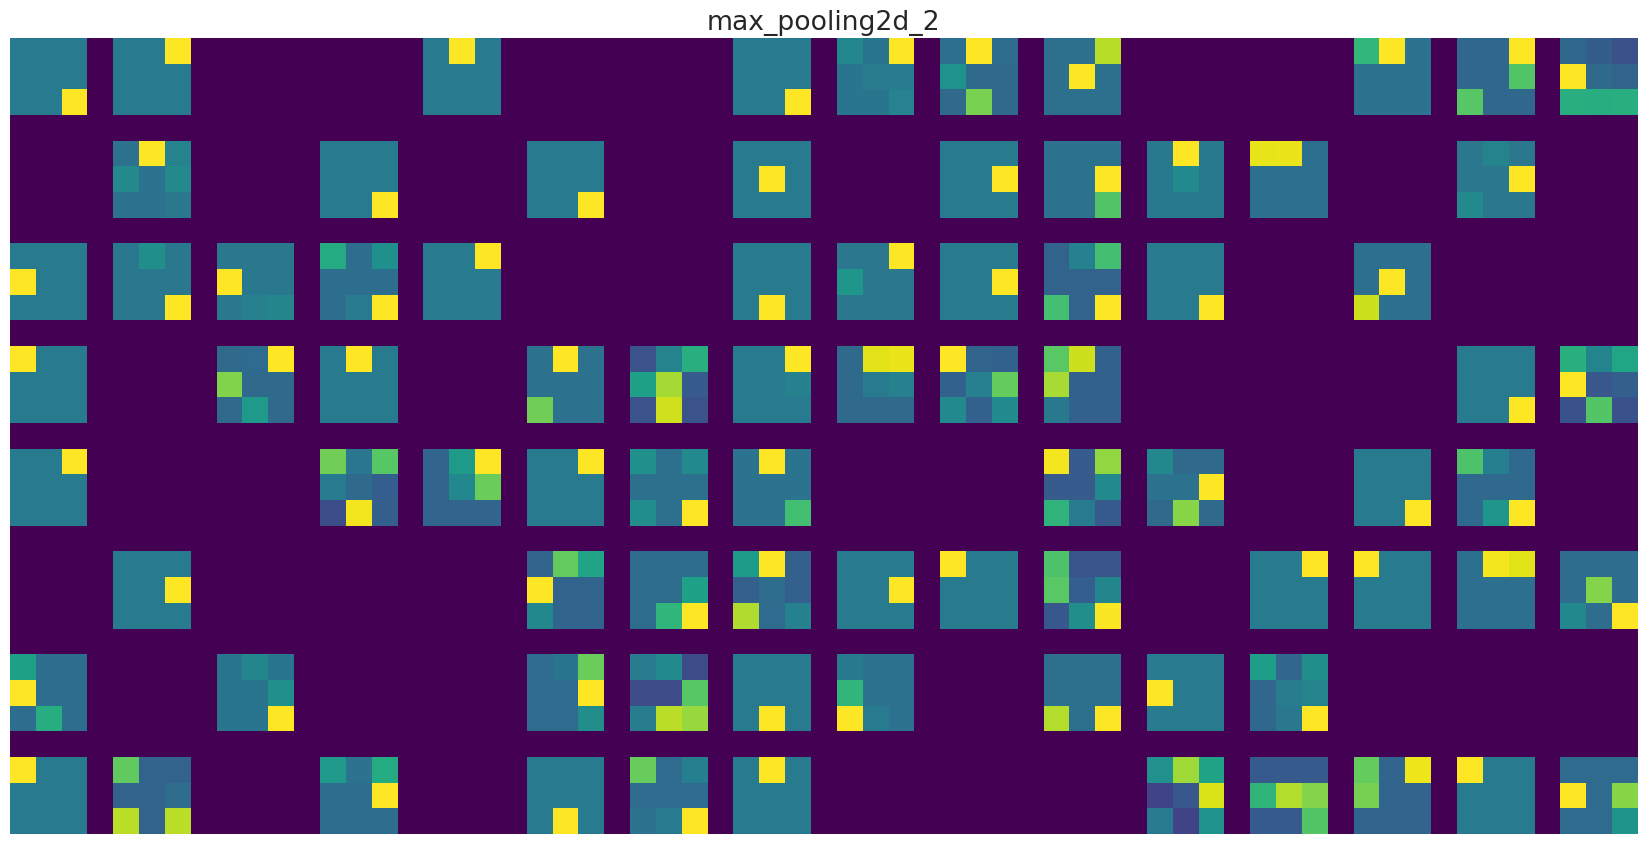

In [ ]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

# References
* https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6
* https://www.tensorflow.org/guide/keras?hl=pt-br
* https://keras.io/guides/
* https://bioinfo.com.br/metricas-de-avaliacao-em-machine-learning-acuracia-sensibilidade-precisao-especificidade-e-f-score/ 

Book: Deep Learning With Python [François Chollet, 2021] - Second Edition

Chapter 5 - Fundamentals of machine learning

Chapter 8 - Introduction to Deep Learning for computer vision

Dataset: [Br35H](https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection)